# Лабораторная работа 1

## Выполнил(а): __Щеткин Дмитрий Сергеевич__

In [1]:
import pandas as pd

In [2]:
# Загружаем данные файла MarketingSpend.csv с помощью pandas в объект типа DataFrame

data = pd.read_csv('MarketingSpend.csv', header = 0, names = ['Date', 'Offline', 'Online'])

print('-'*80)
print(data.describe())
print('-'*80)
print(data.info())

--------------------------------------------------------------------------------
           Offline       Online
count   365.000000   365.000000
mean   2843.561644  1905.880740
std     952.292448   808.856853
min     500.000000   320.250000
25%    2500.000000  1258.600000
50%    3000.000000  1881.940000
75%    3500.000000  2435.120000
max    5000.000000  4556.930000
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     365 non-null    object 
 1   Offline  365 non-null    int64  
 2   Online   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB
None


In [3]:
# Загружаем данные файла Retail.csv с помощью pandas в объект типа DataFrame

data1 = pd.read_csv('Retail.csv')

print('-'*80)
print(data1.describe())
print('-'*80)
print(data1.info())

--------------------------------------------------------------------------------
           InvoiceNo      StockCode       Quantity
count  181247.000000  181247.000000  181247.000000
mean   557388.037297   21355.529625       4.560920
std     12905.503448    1362.139130      20.333066
min    536598.000000   10002.000000       1.000000
25%    545700.000000   21135.000000       1.000000
50%    557026.000000   21672.000000       1.000000
75%    568703.000000   22055.000000       2.000000
max    580137.000000   22314.000000     900.000000
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181247 entries, 0 to 181246
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    181247 non-null  int64 
 1   InvoiceDate  181247 non-null  object
 2   StockCode    181247 non-null  int64 
 3   Quantity     181247 non-null  int64 
dtypes: int64(3),

In [4]:
# Вычисляем статистические функции для файла Retail.csv

print('Количество уникальных InvoiceNo:')
print(data1['InvoiceNo'].nunique())
print('-'*80)

print('Количество уникальных StockCode:')
print(data1['StockCode'].nunique())
print('-'*80)

print('Количество StockCode в InvoiceNo:')
print(data1.groupby('InvoiceNo')['Quantity'].sum())
print('-'*80)

print('Топ 10 StockCode, которых заказали наибольшее число раз:')
print(data1['StockCode'].value_counts().head(10))
print('-' * 80)

Количество уникальных InvoiceNo:
16522
--------------------------------------------------------------------------------
Количество уникальных StockCode:
1178
--------------------------------------------------------------------------------
Количество StockCode в InvoiceNo:
InvoiceNo
536598    29
536599     4
536600     2
536602     4
536604     1
          ..
580133    78
580134    11
580135     5
580136    64
580137    30
Name: Quantity, Length: 16522, dtype: int64
--------------------------------------------------------------------------------
Топ 10 StockCode, которых заказали наибольшее число раз:
StockCode
20725    1549
22197    1357
21212    1325
20727    1281
21931    1162
20728    1145
22086    1083
15056    1070
20724    1022
20726    1009
Name: count, dtype: int64
--------------------------------------------------------------------------------


In [5]:
# Вычисляем статистические функции для файла MarketingSpend.csv

print('Offline:')
print(f"Среднее значение: {data['Offline'].mean():.3f}")
print(f"Максимальное значение: {data['Offline'].max()}")
print(f"Минимальное значение: {data['Offline'].min()}")
print(f"Среднее квадратичное отклонение: {data['Offline'].std():.3f}")
print(f"Дисперсия: {data['Offline'].var():.3f}")
print('-'*80)

print('Online:')
print(f"Среднее значение: {data['Online'].mean():.3f}")
print(f"Максимальное значение: {data['Online'].max()}")
print(f"Минимальное значение: {data['Online'].min()}")
print(f"Среднее квадратичное отклонение: {data['Online'].std():.3f}")
print(f"Дисперсия: {data['Online'].var():.3f}")
print('-'*80)

Offline:
Среднее значение: 2843.562
Максимальное значение: 5000
Минимальное значение: 500
Среднее квадратичное отклонение: 952.292
Дисперсия: 906860.906
--------------------------------------------------------------------------------
Online:
Среднее значение: 1905.881
Максимальное значение: 4556.93
Минимальное значение: 320.25
Среднее квадратичное отклонение: 808.857
Дисперсия: 654249.409
--------------------------------------------------------------------------------


In [6]:
%%sh
ls -la

total 4824
drwxr-xr-x 1 root root    4096 Mar 16 16:41 .
drwxr-xr-x 1 root root    4096 Mar 16 16:40 ..
drwxr-xr-x 4 root root    4096 Mar 13 13:31 .config
-rw-r--r-- 1 root root    8679 Mar 16 16:41 MarketingSpend.csv
-rw-r--r-- 1 root root 4910224 Mar 16 16:41 Retail.csv
drwxr-xr-x 1 root root    4096 Mar 13 13:31 sample_data


## Задание 1.2



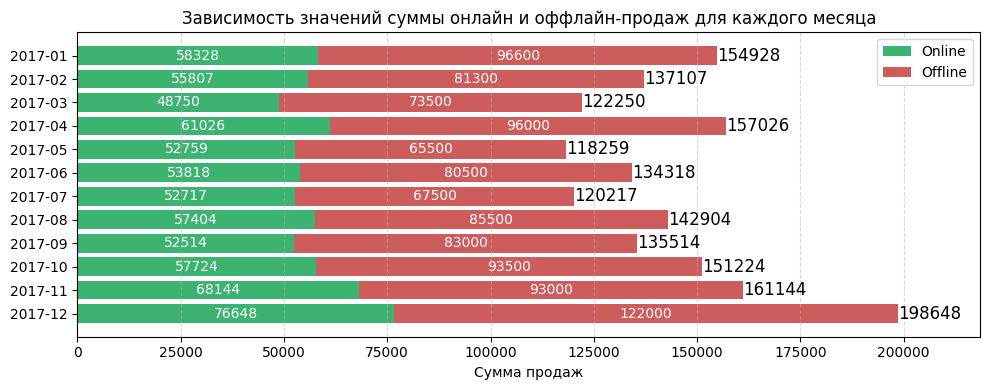

In [7]:
# Построение столбчатого графика для файла MarketingSpend.csv (Зависимость значений суммы онлайн и оффлайн-продаж для каждого месяца)

import matplotlib.pyplot as plt
import numpy as np

# Преобразование данных
data['Date'] = pd.to_datetime(data['Date'])
data['YearMonth'] = data['Date'].dt.to_period('M')
monthly_sales = data.groupby('YearMonth')[['Offline', 'Online']].sum().reset_index()
monthly_sales['Total'] = monthly_sales['Offline'] + monthly_sales['Online']

# Создание столбчатого графика
fig, ax = plt.subplots(figsize=(10, 4))

# Месяцы по оси Y
y_positions = np.arange(len(monthly_sales))

# Отображение столбцов
bars1 = ax.barh(y_positions, monthly_sales['Online'], color='#3CB371', label='Online')
bars2 = ax.barh(y_positions, monthly_sales['Offline'], left=monthly_sales['Online'], color='#CD5C5C', label='Offline')

# Добавление значений на график
for bar, value in zip(bars1, monthly_sales['Online']):
    ax.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f"{int(value)}", ha='center', va='center', color='white', fontsize=10)
for bar, value in zip(bars2, monthly_sales['Offline']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f"{int(value)}", ha='center', va='center', color='white', fontsize=10)
for i, total in enumerate(monthly_sales['Total']):
    ax.text(total + 5, y_positions[i], f"{int(total)}", fontsize=12, color='black', va='center')

ax.set_xlim(0, max(monthly_sales['Total']) * 1.1)
ax.set_yticks(y_positions)
ax.set_yticklabels(monthly_sales['YearMonth'].astype(str))
ax.set_xlabel('Сумма продаж')
ax.set_title('Зависимость значений суммы онлайн и оффлайн-продаж для каждого месяца')
ax.legend()

plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

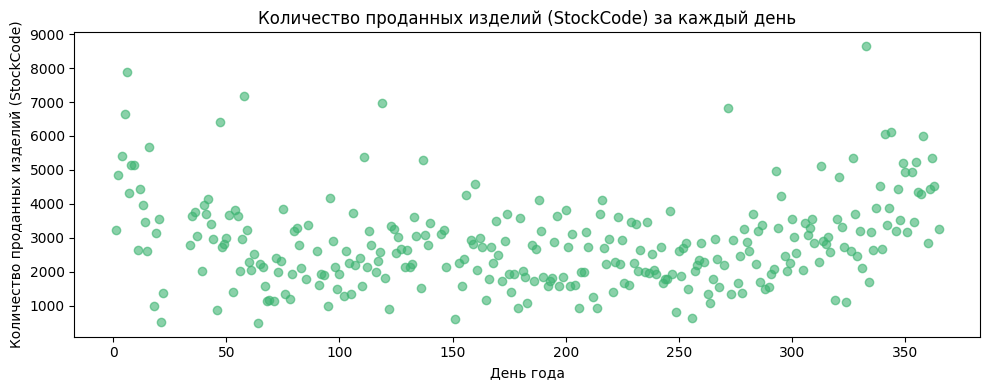

In [8]:
# Построение графика рассеяния для файла Retail.csv (Количество проданных изделий (StockCode) за каждый день)

# Преобразование данных
data1['InvoiceDate'] = pd.to_datetime(data1['InvoiceDate'])
daily_sales = data1.groupby(data1['InvoiceDate'].dt.dayofyear)['Quantity'].sum()

# Построение графика рассеяния
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(daily_sales.index, daily_sales.values, color='#3CB371', alpha=0.6)

ax.set_xlabel('День года')
ax.set_ylabel('Количество проданных изделий (StockCode)')
ax.set_title('Количество проданных изделий (StockCode) за каждый день')

plt.tight_layout()
plt.show()